In [ ]:
!pip install nltk
!pip install langdetect
!pip install bar_chart_race

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ec8907993730735abaa910b60b06a5c2d6cc2fe811f9aa6fbfab6fb612047563
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 156 kB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
#Data processing librairies
import numpy as np
import pandas as pd
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from langdetect import detect
import gensim.downloader as api
#from pycontractions import Contractions
#wordcloud
#from word2number import w2n
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import bar_chart_race as bcr

In [ ]:
last_job_en = pd.read_excel("Last_job_en.xlsx")

In [ ]:
last_job_en.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'id', 'Job Title', 'Company',
       'Area', 'Specialization', 'Date of Publication', 'Deadline', 'Country',
       'City', 'Zone', 'Period', 'content', 'season', 'month', 'year', 'week',
       'month_name', 'language'],
      dtype='object')

In [ ]:
last_job_en.Area.unique()

array(['Management/Gestion, Finance, Comptabilité et Commerce',
       'Santé et Professions médicales', 'Sciences Informatiques',
       'Sciences Humaines et Sociales',
       'Sciences économiques et politiques', '- - Non-defini - -',
       'Secrétariat', 'Métiers du bâtiment et autres', 'Sécurité',
       'Droit', 'Communication et Journalisme', 'Sciences de l’Ingénieur',
       'Architecture, Urbanisme et Aménagement du territoire',
       'Sciences de l’Education', 'Agriculture – Agroalimentaire',
       'Marketing', 'Mathématiques/Physique', 'Transport et Logistique',
       'Langues et Lettres', 'Arts, Culture, Design et mode',
       'Environnement et Sciences de la Terre', 'Douane',
       'Biologie/Chimie', 'Consultant/Expert', 'Mécanique',
       'Tourisme, Hôtellerie et Restauration'], dtype=object)

In [ ]:
my_dict = {}
my_dict['Management/Gestion, Finance, Comptabilité et Commerce'] =0
my_dict['Santé et Professions médicales'] = 1
my_dict['Sciences Humaines et Sociales'] = 2
my_dict['Sciences Informatiques'] = 3
my_dict[ 'Sciences économiques et politiques'] = 2
my_dict[ 'Secrétariat'] = 0
my_dict[ 'Métiers du bâtiment et autres'] = 4
my_dict[ 'Sécurité'] = 2
my_dict['Droit'] = 2
my_dict[ 'Communication et Journalisme'] = 3
my_dict[ 'Architecture, Urbanisme et Aménagement du territoire'] = 4
my_dict[ 'Sciences de l’Education'] = 2
my_dict[ 'Sciences de l’Ingénieur'] = 4
my_dict[ 'Agriculture – Agroalimentaire'] = 1
my_dict[ 'Marketing'] = 0
my_dict[ 'Mathématiques/Physique'] = 1
my_dict[ 'Transport et Logistique'] = 0
my_dict[ 'Langues et Lettres'] = 2
my_dict[ 'Arts, Culture, Design et mode'] = 3
my_dict[ 'Environnement et Sciences de la Terre'] = 1
my_dict[ 'Douane'] = 0
my_dict[ 'Biologie/Chimie'] = 1
my_dict[ 'Mécanique'] = 1
my_dict['Tourisme, Hôtellerie et Restauration'] = 2
my_dict['Consultant/Expert'] = 3
my_dict ['- - Non-defini - -']=3

In [ ]:
my_dict2 ={}
my_dict2[0]='Management/finance/HR'
my_dict2[1]='Natural Science'
my_dict2[2]='Humanities and Social Sciences'
my_dict2[3]='TIC/Art/Expertise/Others'
my_dict2[4]='Engineering'


In [ ]:
last_job_en['Category_id']  = last_job_en['Area'].replace(my_dict)

In [ ]:
last_job_en['Category']=last_job_en['Category_id'].replace(my_dict2)

In [ ]:
last_job_en

,Unnamed: 0,Unnamed: 0.1,index,id,Job Title,Company,Area,Specialization,Date of Publication,Deadline,Country,City,Zone,Period,content,season,month,year,week,month_name,language,Category_id,Category
0,0,0,14,35,Human Resources Manager,ong,"Management/Gestion, Finance, Comptabilité et C...",Gestion des Ressources Humaines,2008-08-11,2008-08-22,Haiti,Undetermined,PAP,Indeterminée,IntroductionNon Governmental Organization look...,summer,8,2008,33,August,en,0,Management/finance/HR
1,1,1,119,146,Purchasing coordinator,ong,"Management/Gestion, Finance, Comptabilité et C...",Management/Gestion,2008-10-27,2008-10-31,Haiti,Undetermined,PAP,Indeterminée,IntroductionInternational Organization look pu...,autumn,10,2008,44,October,en,0,Management/finance/HR
2,2,2,127,155,Operation Manager,Modas Gloria Apparel S.A.,"Management/Gestion, Finance, Comptabilité et C...",Management/Gestion,2008-10-29,2008-10-31,Haiti,Port-au-Prince,Port - au - Prince,Indeterminé,IntroductionFonctions create Master schedule e...,autumn,10,2008,44,October,en,0,Management/finance/HR
3,3,3,165,195,Chief of Party --- AidsRelief,Catholic Relief Services,Santé et Professions médicales,Médecine communautaire,2008-11-05,2008-11-19,Haiti,Undetermined,Port-au-Prince,Three years ( 3 years),IntroductionThe Catholic Relief Services seek ...,autumn,11,2008,45,November,en,1,Natural Science
4,4,4,166,196,Health Systems Manager,Catholic Relief Services,"Management/Gestion, Finance, Comptabilité et C...",Management/Gestion,2008-11-05,2008-11-19,Haiti,Undetermined,Port-au-Prince,1 An,IntroductionPrimary FunctionThe Health Systems...,autumn,11,2008,45,November,en,0,Management/finance/HR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1795,1795,8724,13003,Maintenance Coordinator,Unilever Caribe,Sciences de l’Ingénieur,Génie Mécanique,2021-07-02,2021-07-31,Haiti,Port-au-Prince,Tabarre,undetermined,introductionour BUSINESS -PRON- clear purpose ...,summer,7,2021,26,July,en,4,Engineering
1796,1796,1796,8725,13004,Marketing and Communications Manager (MCM),Catholic Relief Services,Communication et Journalisme,Communication,2021-07-14,2021-07-15,Haiti,Undetermined,"1, Delmas 81",Indéterminée,IntroductionJob summary marketing communicatio...,summer,7,2021,28,July,en,3,TIC/Art/Expertise/Others
1797,1797,1797,8741,13020,Regional Partner Safeguarding Advisor,Catholic Relief Services,Sciences Humaines et Sociales,Sciences du Développement,2021-07-14,2021-07-26,Haiti,Port-au-Prince,TBD,Indéterminée,IntroductionAbout crscatholic Relief Services ...,summer,7,2021,28,July,en,2,Humanities and Social Sciences
1798,1798,1798,8742,13021,Regional Recruiter,Catholic Relief Services,"Management/Gestion, Finance, Comptabilité et C...",Gestion des Ressources Humaines,2021-07-14,2021-07-26,Haiti,Port-au-Prince,TBD,Indéterminée,IntroductionAbout crscatholic Relief Services ...,summer,7,2021,28,July,en,0,Management/finance/HR


In [ ]:
def generate_barchart(data=last_job_en, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=True):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index,palette='Blues')
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='Yelow',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='green',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()  

In [ ]:
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
 
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     last_job_en = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=last_job_en, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return last_job_en

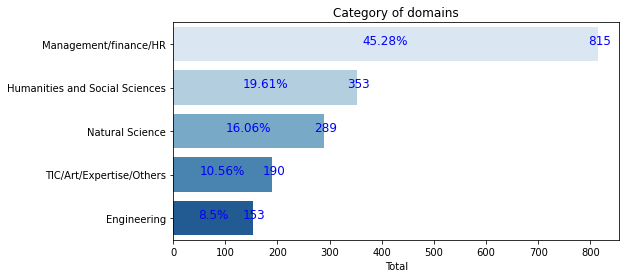

,Total,Percent
Management/finance/HR,815,0.452778
Humanities and Social Sciences,353,0.196111
Natural Science,289,0.160556
TIC/Art/Expertise/Others,190,0.105556
Engineering,153,0.085000


In [ ]:
prob_category(data=last_job_en, top_n= 5, col='Category', show_plot=True, figsize= (8,4),title='Category of domains')

In [ ]:
last_job_en.City.unique()

array(['Undetermined', 'Port-au-Prince', 'Delmas', 'Tabarre',
       'Petion-Ville', 'Cap-Haitien', 'Jacmel', 'Cayes', 'Cabaret',
       'Caracol', 'Ganthier', 'Fort-Liberte', 'Gonaives', 'Arcahaie',
       'Dame-Marie', 'Carrefour', 'Mirebalais', 'Santo Domingo',
       'Marmelade', 'Thomonde', 'Jeremie', 'Miragoane', 'Coteaux',
       'Roche-a-Bateaux', 'Chantal', 'Camp-Perrin', 'Petit-Goave',
       'Cotes-de-Fer', 'Fort-Lauderdale', 'Croix-des-Bouquets'],
      dtype=object)

In [ ]:
dict_dep = {}
dict_dep['Port-au-Prince']='Ouest'
dict_dep['Delmas']='Ouest'
dict_dep['Petion-Ville']='Ouest'
dict_dep['Croix-des-Bouquets']='Ouest'
dict_dep['Tabarre']='Ouest'
dict_dep['Ganthier']='Ouest'
dict_dep['Cabaret']='Ouest'
dict_dep['Arcahaie']='Ouest'
dict_dep['Carrefour']='Ouest'
dict_dep['Cotes-de-Fer']='Ouest'
dict_dep['Cap-Haitien']='Nord'
dict_dep['Jacmel']='Sud-Est'
dict_dep['Cayes']='Sud'
dict_dep['Caracol']='Nord-Est'
dict_dep['Fort-Liberte']='Nord-Est'
dict_dep['Gonaives']='Artibonite'
dict_dep['Mirebalais']='Centre'
dict_dep['Marmelade']='Artibonite'
dict_dep['Thomonde']='Artibonite'
dict_dep['Jeremie']='Grande-Anse'
dict_dep['Miragoane']='Nippes'
dict_dep['Coteaux']='Sud'
dict_dep['Roche-a-Bateaux']='Sud'
dict_dep['Chantal']='Sud'
dict_dep['Camp-Perrin']='Sud'
dict_dep['Petit-Goave']='Ouest'
dict_dep['Chantal']='Sud'
dict_dep['Dame-Marie']='Grande-Anse'
dict_dep['Fort-Lauderdale']='Undetermined'
dict_dep['Undetermined']='Undetermined'
dict_dep['Santo Domingo']='Est'

In [ ]:
last_job_en['Departement']  = last_job_en['City'].replace(dict_dep)

In [ ]:
last_job_en['Period'] =last_job_en['Period'].str.lower()
last_job_en['Period'].fillna('',inplace=True)
last_job_en['job_Indetermined'] = 'No'
last_job_en.loc[last_job_en['Period'].str.contains('indetermin'),'job_Indetermined'] ='Yes'
last_job_en.loc[last_job_en['Period'].str.contains('undetermin'),'job_Indetermined'] ='Yes'
last_job_en.loc[last_job_en['Period'].str.contains('indéterm'),'job_Indetermined'] ='Yes'


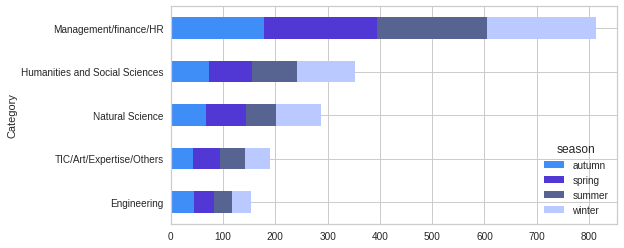

In [ ]:
colors = ["#3f8df6", "#5138d4","#576492",'#bac9ff']
data_map.sort_values(by='All',inplace=True)
data_map.loc[:,['autumn',	'spring','summer',	'winter']].plot(stacked=True, kind='barh', color=colors, figsize=(8,4))
# df_rel = df[df.columns[1:]].div(df_total, 0)*100
# for n in df_rel:
#         #plt.text(tot, i, str(tot), va='center',fontsize='8')
#         #plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center',fontsize='8')

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index=["Category"],columns ='season',values='id',aggfunc="count",fill_value=0).astype('int')
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=13.836, p=0.311
Probably independent


stat=621.192, p=0.000
Probably dependent


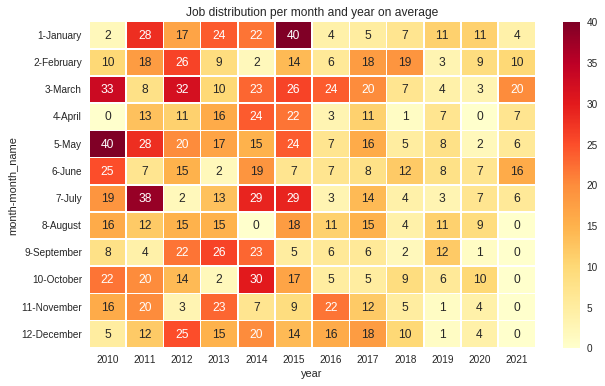

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index=["month","month_name"],columns ='year',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
axe=sns.heatmap(data=data_map.loc[:,2010:2021],annot=True, fmt="d", cmap="YlOrRd", linewidths=.6)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

<Figure size 720x432 with 0 Axes>

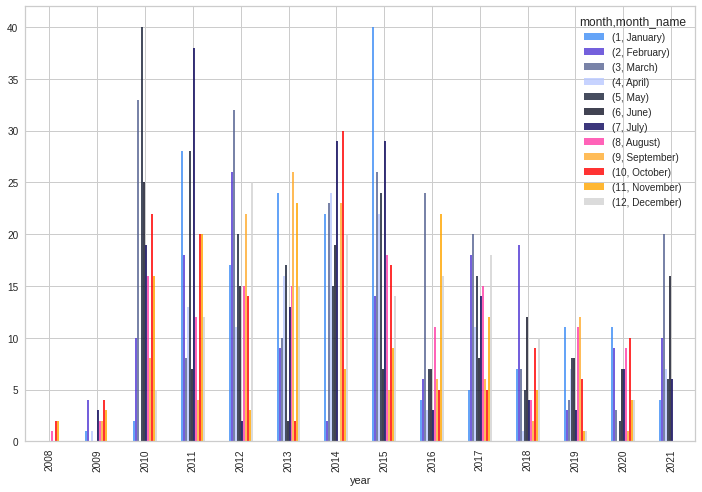

In [ ]:
colors = ["#3f8df6", "#5138d4","#576492",'#bac9ff','#182037','#121427','#0b055b','#ff3ca6','#ffab2e','red','orange','lightgray']
data_map =pd.pivot_table(data=last_job_en,columns=["month","month_name"],index ='year',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
data_map.plot( kind='bar', color=colors, figsize=(12,8),alpha=0.8)

stat=47.564, p=0.192
Probably independent


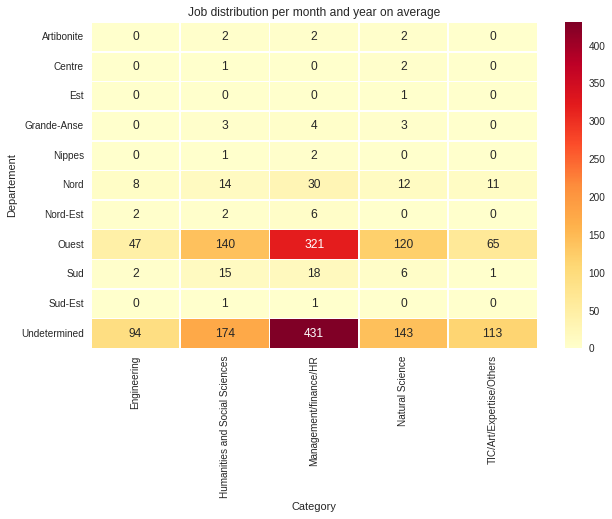

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index="Departement",columns ='Category',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
axe=sns.heatmap(data=data_map,annot=True, fmt="d", cmap="YlOrRd", linewidths=.6)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=3.654, p=0.455
Probably independent


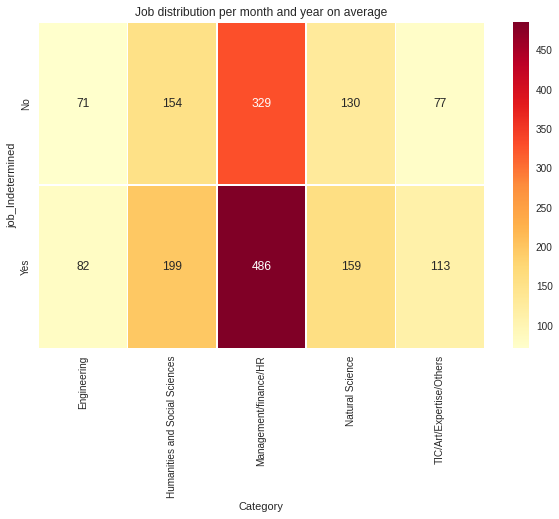

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index="job_Indetermined",columns ='Category',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
axe=sns.heatmap(data=data_map,annot=True, fmt="d", cmap="YlOrRd", linewidths=.6)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=3.089, p=0.378
Probably independent


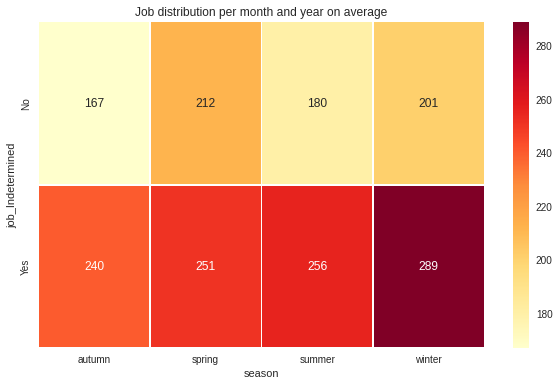

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index="job_Indetermined",columns ='season',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
axe=sns.heatmap(data=data_map,annot=True, fmt="d", cmap="YlOrRd", linewidths=.6)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=687.793, p=0.000
Probably dependent


<Figure size 720x432 with 0 Axes>

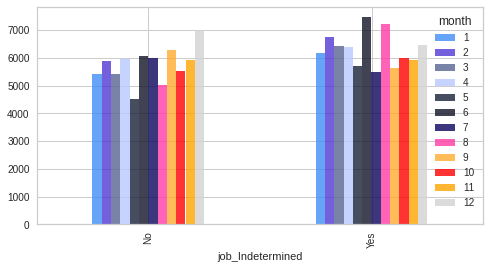

In [ ]:
colors = ["#3f8df6", "#5138d4","#576492",'#bac9ff','#182037','#121427','#0b055b','#ff3ca6','#ffab2e','red','orange','lightgray']
data_map =pd.pivot_table(data=last_job_en,index="job_Indetermined",columns ='month',values='id',aggfunc="mean",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
data_map.plot( kind='bar', color=colors, figsize=(8,4),alpha=0.8)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=25.742, p=0.004
Probably dependent


<Figure size 720x432 with 0 Axes>

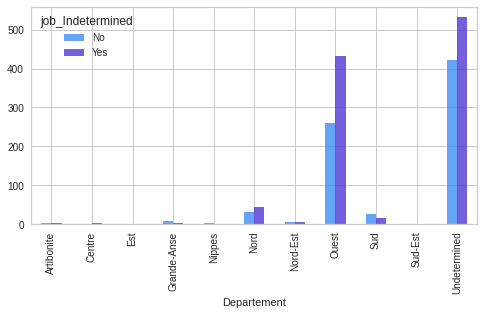

In [ ]:
colors = ["#3f8df6", "#5138d4","#576492",'#bac9ff','#182037','#121427','#0b055b','#ff3ca6','#ffab2e','red','orange','lightgray']
data_map =pd.pivot_table(data=last_job_en,index="Departement",columns ='job_Indetermined',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
data_map.plot( kind='bar', color=colors, figsize=(8,4),alpha=0.8)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=25.742, p=0.004
Probably dependent


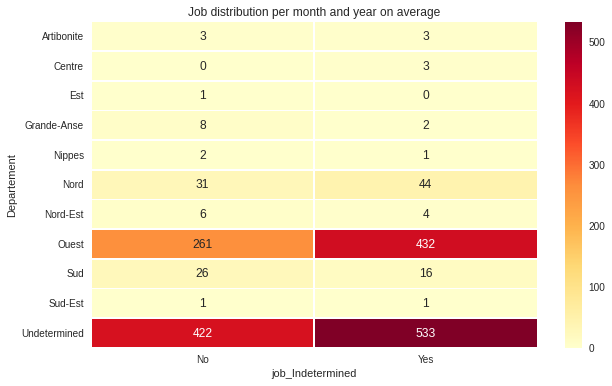

In [ ]:
data_map =pd.pivot_table(data=last_job_en,index="Departement",columns ='job_Indetermined',values='id',aggfunc="count",fill_value=0).astype('int')
plt.figure(figsize=(10,6))
axe=sns.heatmap(data=data_map,annot=True, fmt="d", cmap="YlOrRd", linewidths=.6)
axe.set_title("Job distribution per month and year on average")
stat, p, dof, expected = stats.chi2_contingency(data_map)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

In [ ]:
last_job_en['job_Indetermined'].value_counts()

Yes    1039
No      761
Name: job_Indetermined, dtype: int64

In [ ]:
last_job_en[last_job_en.job_Indetermined == 'No']['Period'].unique()

array(['three years ( 3 years)', '1 an', '2 ans', ' 6 months renewable',
       '1 an renouvelable', 'déterminée', '6 mois renouvelable',
       '12 months', 'determinée', '6 months renewable', 'up to 2  years',
       'up to 3 years', '6 mois', '4 months', '1 month', 'determiné',
       '6 months', 'long term', 'long term contract', '3 months',
       '1 year', '3 months with possibility of extension',
       'special short-term, six months, with possibility of extension.',
       '3 months with possibility of extension.',
       'permanent  position with at first a one year contract',
       '1 month with possibility of extension',
       'we are looking for along term commitment, preferably two years (negotiable)',
       'we are looking for along term commitment preferably two years (negotiable)',
       ' we are looking for a long term commitment, preferably two years (negotiable)',
       'contract period:  six months',
       'contract period: we are looking for along term commi

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import time 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
!pip install yellowbrick

In [ ]:
from yellowbrick.classifier import ClassificationReport,ROCAUC,ClassBalance,ConfusionMatrix,DiscriminationThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
y= last_job_en['Category']

In [ ]:
#Create variable and check model
tfidfVectorizer = TfidfVectorizer(ngram_range=(0,1))
X_train_counts_tfidf = tfidfVectorizer.fit_transform(last_job_en.content.values)
df_final =pd.DataFrame(X_train_counts_tfidf.toarray(),columns=tfidfVectorizer.get_feature_names())

In [ ]:
df_final.shape

(1800, 28335)

In [ ]:
def vif_fuction(X):
  vif_df=pd.DataFrame()
  vif_df['variables'] = X.columns
  vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif_df

In [ ]:
# cals =vif_fuction(df_final)
# cals.head()
X=df_final
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=49)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb.score(X_test,y_test)

0.65

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred,y_true=y_test))

                                precision    recall  f1-score   support

                   Engineering       0.76      0.45      0.57        42
Humanities and Social Sciences       0.70      0.50      0.58       107
         Management/finance/HR       0.65      0.84      0.73       248
               Natural Science       0.68      0.58      0.62        92
      TIC/Art/Expertise/Others       0.46      0.33      0.39        51

                      accuracy                           0.65       540
                     macro avg       0.65      0.54      0.58       540
                  weighted avg       0.65      0.65      0.64       540



In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test,y_test)

0.7314814814814815

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred,y_true=y_test))

                                precision    recall  f1-score   support

                   Engineering       0.97      0.71      0.82        42
Humanities and Social Sciences       0.74      0.59      0.66       107
         Management/finance/HR       0.70      0.92      0.80       248
               Natural Science       0.79      0.65      0.71        92
      TIC/Art/Expertise/Others       0.65      0.25      0.37        51

                      accuracy                           0.73       540
                     macro avg       0.77      0.63      0.67       540
                  weighted avg       0.74      0.73      0.72       540



In [ ]:
rd = RidgeClassifier()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.7814814814814814

In [ ]:
y_pred = rd.predict(X_test)
print(classification_report(y_pred=y_pred,y_true=y_test))

                                precision    recall  f1-score   support

                   Engineering       0.90      0.86      0.88        42
Humanities and Social Sciences       0.81      0.63      0.71       107
         Management/finance/HR       0.78      0.90      0.83       248
               Natural Science       0.77      0.76      0.77        92
      TIC/Art/Expertise/Others       0.68      0.49      0.57        51

                      accuracy                           0.78       540
                     macro avg       0.79      0.73      0.75       540
                  weighted avg       0.78      0.78      0.78       540



In [ ]:
rfc= RandomForestClassifier(random_state=49)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.6703703703703704

In [ ]:
rfc.feature_importances_*10000

array([0.        , 0.53565086, 0.36065118, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6722222222222223

In [ ]:
gbc = GradientBoostingClassifier(random_state=49)
gbc= KNeighborsClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_test,y_test)

0.6722222222222223

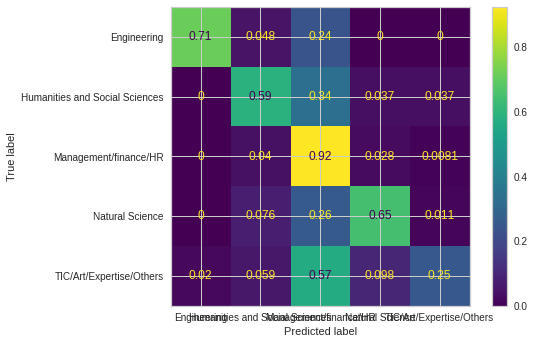

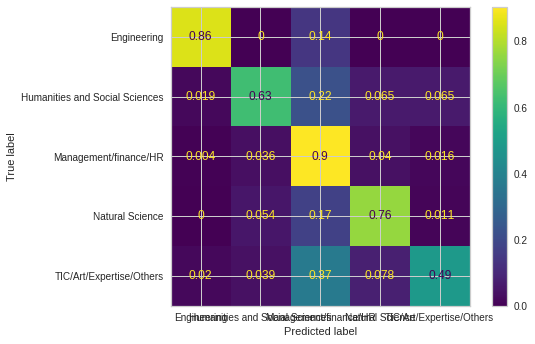

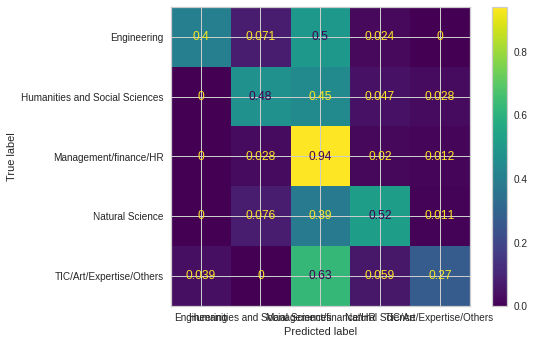

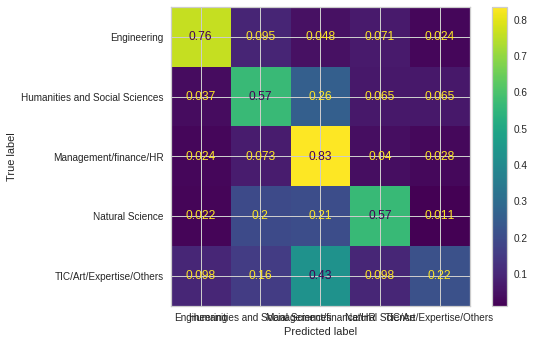

In [ ]:
#Check other model
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","RandomForestClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test,normalize='true')
 # plot_roc_curve(model,X_test,y_test)

In [ ]:
df = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
df

,names,scores,times
0,LogisticRegression,0.731481,17.898961
1,RidgeClassifier,0.781481,2.123926
2,RandomForestClassifier,0.672222,4.995218
3,KNeighborsClassifier,0.672222,4.221043


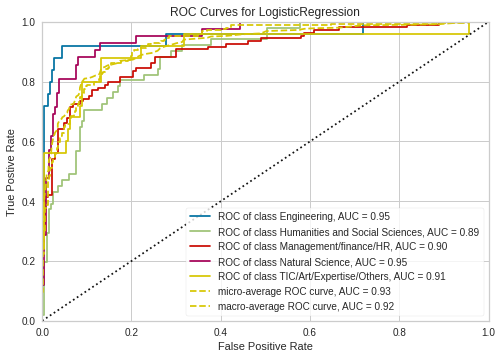

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(models[0], X_train, y_train, X_test=X_test, y_test=y_test)

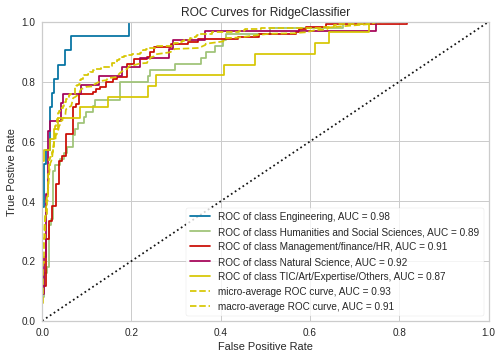

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(models[1], X_train, y_train, X_test=X_test, y_test=y_test)

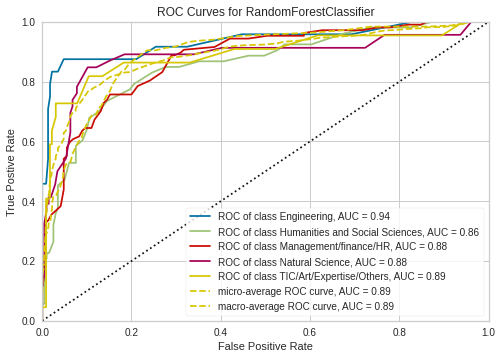

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(models[2], X_train, y_train, X_test=X_test, y_test=y_test)

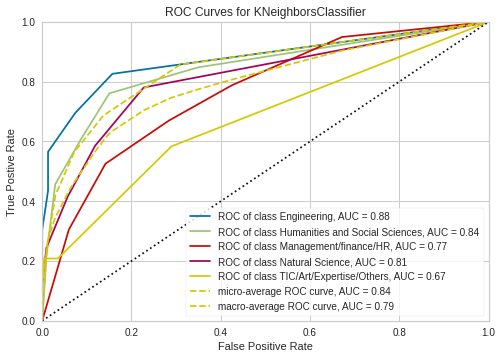

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(models[3], X_train, y_train, X_test=X_test, y_test=y_test)

In [ ]:
data =rfc.feature_importances_

In [ ]:
df_score =pd.DataFrame(data=data,index=df_final.columns,columns=['score'])

NameError: ignored

In [ ]:
df_score['score'] *= 1000

In [ ]:
df_score.sort_values(by='score',ascending=False,inplace=True)

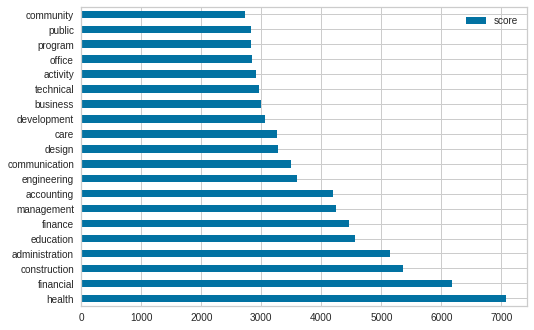

In [ ]:
df_score.head(20).plot(kind='barh',)

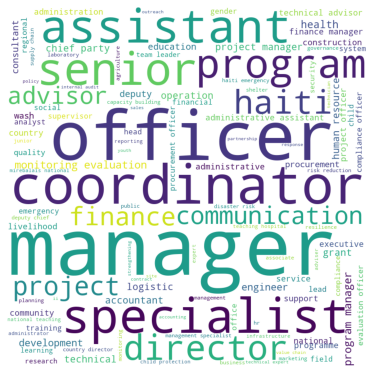

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in last_job_en['Job Title']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df_score2 =df_score.reset_index()
df_score2 ['score'] = df_score2['score'].astype('int')
df_score2['content'] = (' '+df_score2['index'] )*df_score2['score']

In [ ]:
df_score2['content'] 

0         health health health health health health hea...
1         financial financial financial financial finan...
2         construction construction construction constr...
3         administration administration administration ...
4         education education education education educa...
                               ...                        
28330                                                     
28331                                                     
28332                                                     
28333                                                     
28334                                                     
Name: content, Length: 28335, dtype: object

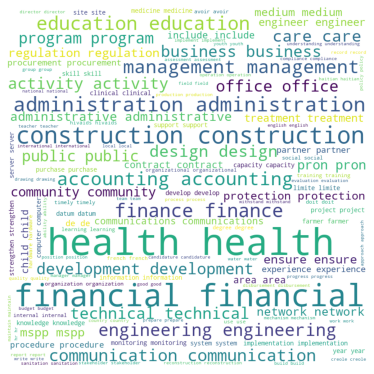

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df_score2['content'] :
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()